# # SUPERMARKET ANALYSIS

![](https://thumbs.dreamstime.com/b/shopping-cart-supermarket-empty-shelves-40320116.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [3]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#  Total sales with Tax

In [6]:
print('Total sales = ',data['Total'].sum())

Total sales =  322966.749


# Which Branch High sales

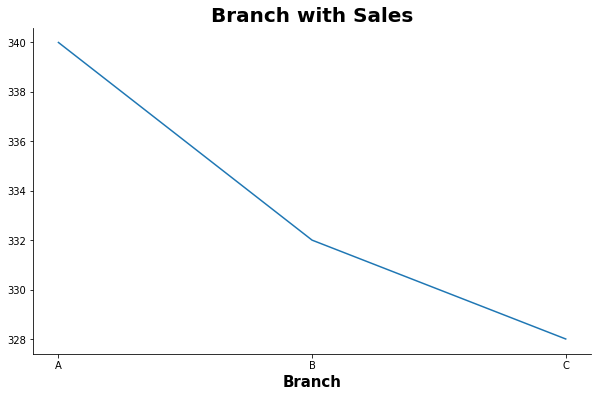

In [7]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(x=data['Branch'].value_counts().index,y=data['Branch'].value_counts().values,palette='#800000')
sns.despine()
plt.xlabel('Branch',weight ='bold',fontsize=15)
plt.title('Branch with Sales',weight = 'bold',fontsize=20)
plt.show()

# Which City Higher sales

Text(0.5, 0, 'City')

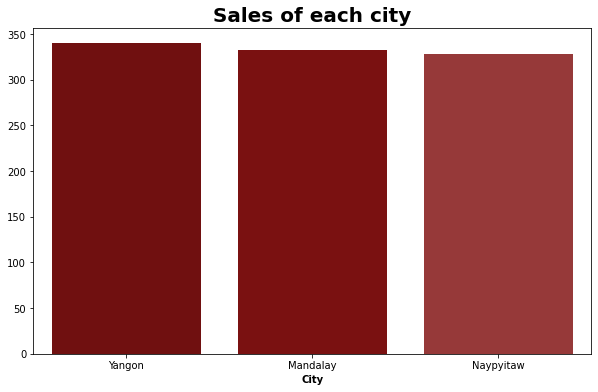

In [8]:
color = ['#800000','#8B0000','#A52A2A','#B22222','#DC143C','#FF0000','#FF6347']
fig = plt.figure(figsize=(10,6))
sns.barplot(x=data['City'].value_counts().index,y=data['City'].value_counts().values,palette=color)
plt.title('Sales of each city',weight='bold',fontsize=20)
plt.xlabel('City',weight='bold',fontsize=10)

# Gender of Sales

In [9]:
salesGender = data.groupby(['Gender'])['Total'].sum().reset_index()

Text(0.5, 0, 'Gender')

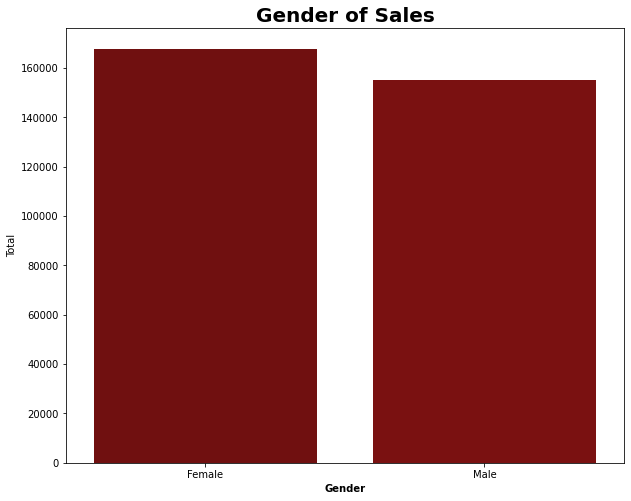

In [10]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x=salesGender['Gender'],y=salesGender['Total'],palette=color)
plt.title('Gender of Sales',weight='bold',fontsize=20)
plt.xlabel('Gender',weight = 'bold',fontsize=10)

In [11]:
Productline = data.groupby(['Product line'])['Total'].sum().reset_index().sort_values('Total',ascending=False)

Text(0.5, 0, 'Product')

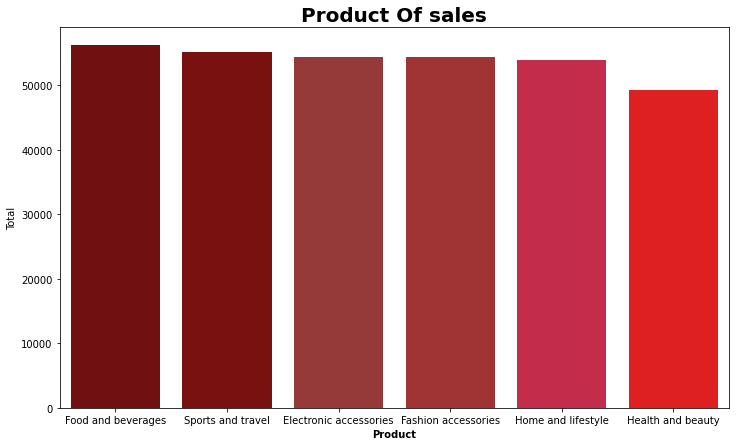

In [12]:
fig = plt.figure(figsize=(12,7))
sns.barplot(x=Productline['Product line'],y=Productline['Total'],palette=color)
plt.title('Product Of sales',weight='bold',fontsize = 20)
plt.xlabel('Product',weight='bold',fontsize=10)

# Which month more sales

In [13]:
data['Date1'] = pd.to_datetime (data['Date'])

In [14]:
data['year']=data['Date1'].dt.year
data['month']=data['Date1'].dt.month_name()

In [15]:
monthsales = data.groupby(['month'])['Total'].sum().reset_index()

Text(0.5, 0, 'month')

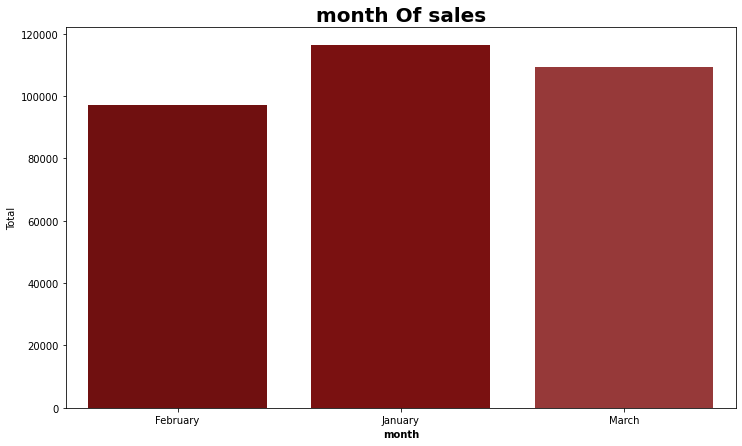

In [16]:
fig = plt.figure(figsize=(12,7))
sns.barplot(x=monthsales['month'],y=monthsales['Total'],palette=color)
plt.title('month Of sales',weight='bold',fontsize = 20)
plt.xlabel('month',weight='bold',fontsize=10)

# Monthly sales of product 

In [17]:
data.groupby(['Product line','month'])['Total'].sum()

Product line            month   
Electronic accessories  February    17362.9050
                        January     18831.2880
                        March       18143.3385
Fashion accessories     February    19009.8615
                        January     19345.1160
                        March       15950.9175
Food and beverages      February    20000.3580
                        January     19570.5300
                        March       16573.9560
Health and beauty       February    14602.2555
                        January     16383.1710
                        March       18208.3125
Home and lifestyle      February    12434.3835
                        January     20494.7400
                        March       20932.7895
Sports and travel       February    13809.6105
                        January     21667.0230
                        March       19646.1930
Name: Total, dtype: float64

# Payment of sales peple

In [18]:
data['Payment'] = data['Payment'].astype(str)

Text(0.5, 0, 'Pyment')

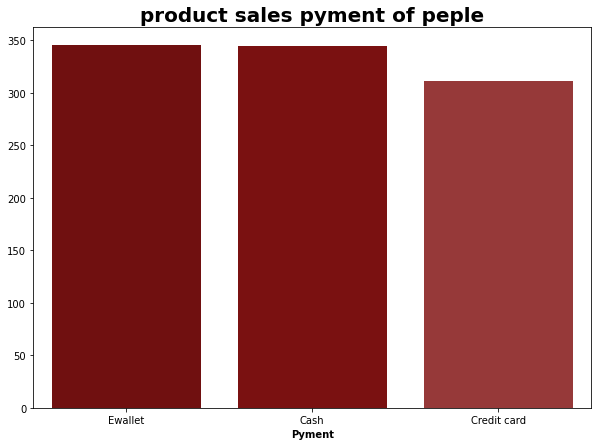

In [19]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x= data['Payment'].value_counts().index,y=data['Payment'].value_counts().values,palette = color)
plt.title('product sales pyment of peple',weight = 'bold',fontsize=20)
plt.xlabel('Pyment',weight='bold',fontsize=10)

# Product of Rating

In [20]:
rading =data.groupby(['Product line'])['Rating'].count().reset_index()

Text(0.5, 1.0, 'Product of rating')

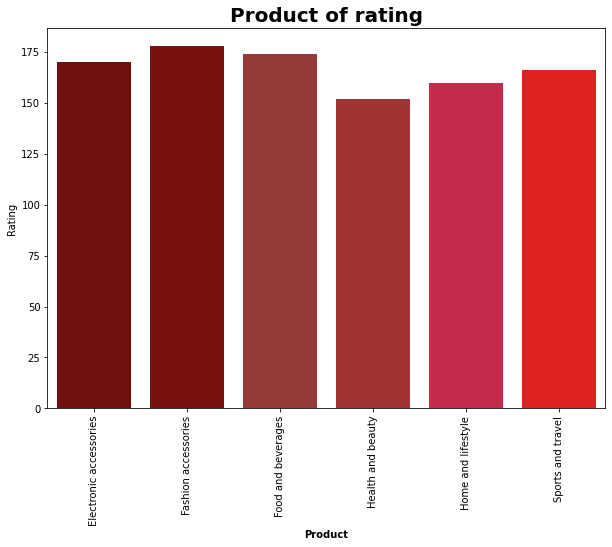

In [21]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x=rading['Product line'],y=rading['Rating'],palette = color)
plt.tick_params(axis = 'x',rotation = 90)
plt.xlabel('Product',weight = 'bold')
plt.title('Product of rating',weight='bold',fontsize = 20)